## Step 1 - Memanggil Beberapa Library Dan Module Yang Dibutuhkan


In [1]:
import numpy as np
import keras
from keras.models import model_from_json
from keras.optimizers import Adam
from matplotlib import pyplot as plt
%matplotlib inline
import random
from keras.utils import to_categorical
from sklearn.metrics import classification_report

Using TensorFlow backend.


**Untuk Pengerjaan Pada Sistem Operasi Berbasis Linux Hal In Perlu Dilakukan**

In [2]:
_ROOTPATH = "/home/galgadot/Documents/Skripsi/FlappyBot/"

##### Step Info!

  - MMembuat beberapa fungsi, yakni fungsi loadModel, dan getData()
  - loadModel() berfungsi untuk memanggil model yagn telah selesai dilatih pada proses training,
  - getData(), memiliki parameter jumlah untuk penggunaan data yang akan dites secara manual

In [3]:
def loadModel():
    json_file = open(_ROOTPATH+'saved_networks/saved_model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(_ROOTPATH+"saved_networks/saved_model.h5")
    adam = Adam(lr=1e-4)
    loaded_model.compile(loss='mse',optimizer=adam)
    print("Loaded model from disk")
    return loaded_model



In [13]:
def getData(dataSize):
    foldername = "Data "+str(dataSize)
    data_x = np.load(_ROOTPATH+'initial_data/'+foldername+'/DataX.npy')
    data_y = np.load(_ROOTPATH+'initial_data/'+foldername+'/DataY.npy')
    print('Detail Data', data_x.shape," - ",data_y.shape)
    return data_x, data_y

**Melakukan pemanggilan model, dan pemanggilan data yang akan dites, jumlah data akan mengambil dari data yang sudah bersubfolder dalam folder root**

In [8]:
myModel = loadModel()
myModel.summary()

Instructions for updating:
Colocations handled automatically by placer.
Loaded model from disk
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 20, 32)        8224      
_________________________________________________________________
activation_1 (Activation)    (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        32832     
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 64)        0         
_______________________________________________

**Jumlah data pada parameter bergantung pada ketersedian data pada subfolder initial_data di root folder**

In [20]:
data , target = getData(1000)
print('Sebelum:', target.shape, target[15:25])
target = to_categorical(target)
print('Sesudah:', target.shape, target[15:25])

Detail Data (1000, 80, 80, 4)  -  (1000,)
Sebelum: (1000,) [0 0 1 1 1 1 0 1 1 1]
Sesudah: (1000, 2) [[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


**setalha memanggil model, dan menyiapkan data, selanjutnya dilakukan proses pengujian manual (prediksi)**

In [21]:
predicted_classes = myModel.predict(data)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
test_yt = np.argmax(np.round(target),axis=1)
print(predicted_classes.shape)

(1000,)


**setelah melakuakn prediksi terhadap 1000 data pengujian selanjutnya dicek berapa jumlah tebakan benar sesuai dengan target(class)**

Total 892 Benar


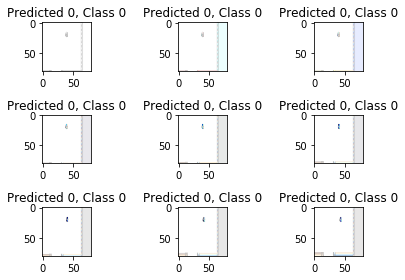

In [22]:
""" Data Benar """
correct = np.where(predicted_classes==test_yt)[0]
print ("Total %d Benar" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(data[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_yt[correct]))
    plt.tight_layout()

**setelah melakuakn prediksi terhadap 1000 data pengujian selanjutnya dicek berapa jumlah tebakan salah yang tidak sesuai dengan target(class)**

Total 108 Salah


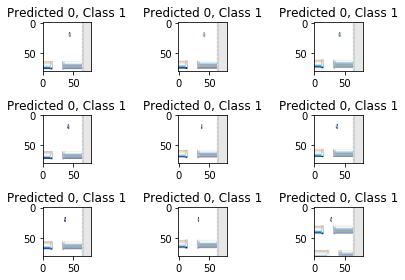

In [23]:
""" Salah Tebak """
incorrect = np.where(predicted_classes!=test_yt)[0]
print ("Total %d Salah" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(data[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_yt[incorrect]))
    plt.tight_layout()

**melakuakn evaluasi dengan clasifikasi report menggunakan f1 score, untuk mengamati sejauh maa model berhasil menebak data baru yang belum pernah ia terima sebelumnya)**

In [25]:
target_names = ["Class {}".format(i) for i in range(2)]
target_names
print(classification_report(test_yt, predicted_classes, target_names=target_names))


              precision    recall  f1-score   support

     Class 0       0.89      1.00      0.94       877
     Class 1       1.00      0.12      0.22       123

   micro avg       0.89      0.89      0.89      1000
   macro avg       0.95      0.56      0.58      1000
weighted avg       0.90      0.89      0.85      1000



In [4]:
import matplotlib.pyplot as plt

myModel = loadModel()


Instructions for updating:
Colocations handled automatically by placer.
Loaded model from disk


In [12]:
from keras.utils import plot_model
plot_model(myModel, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [9]:
plot_model(myModel, to_file='model.png')


ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.